# Author: Harmeet Singh Lamba
## Homework 3

### Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
# cross_val_score, ShuffleSplit
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

###### Data Loading

In [4]:
train_ass = pd.read_csv('ASS_train.csv')
test_ass = pd.read_csv('ASS_test.csv')
train_og = pd.read_csv('OG_train.csv')
test_og = pd.read_csv('OG_test.csv')

###### Data Definition

This Dataset is taken from Kaggle - Digit Recognition Competition
Original Dataset has 42000 rows with 28 pixel x 28 pixel black and white picture stored in 784 columns (pixel) each column holding a greyscale value. Each having Label attached to it showing its original recorded value. 
Original Test Dataset having 28000 values, with all pixel columns and we have to predict the Label value.


A subset of the original dataset is created for this assignment purpose. with 1400 rows fof training and 1000 rows for testing.

###### Classification Problem

Using the grey scale image we have to predict the actual digit the user was trying to write.

###### Data Preprocessing

Splitting dataset into training and cross validation datasets

In [5]:
X_train, X_CV, y_train, y_CV =  train_test_split(train_ass[train_ass.columns[1:785]]
                                                 , train_ass[train_ass.columns[0]], test_size = 0.20)

# Naive Bayes Algorithms

### Gaussian Naive Bayes (GaussianNB)

In [6]:
model = GaussianNB()

In [7]:
param_grid = {"var_smoothing": [True, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [8]:
gnbc = GridSearchCV(model, param_grid=param_grid, cv=10, iid=False, verbose =1, n_jobs=-1)

 Fitting the Model with the provided paramters, performing grid search.

In [9]:
gnbc.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    9.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GaussianNB(priors=None, var_smoothing=1e-09),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'var_smoothing': [True, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [10]:
gnbc.best_params_

{'var_smoothing': 0.1}

In [60]:
gnbc_pred = gnbc.predict(X_CV)

In [76]:
gnbc_model = gnbc

###### Accuracy with Gaussian Naive Bayes

In [61]:
print(f"Accuracy: {round(metrics.accuracy_score(y_CV, gnbc_pred)*100, 2)}%")

Accuracy: 82.14%


In [73]:
confusion_matrix(gnbc_pred, np.array(y_CV))

array([[28,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  1,  5,  0],
       [ 1,  0, 17,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 23,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 21,  0,  1,  1,  0,  1],
       [ 1,  0,  0,  1,  0, 18,  0,  0,  1,  0],
       [ 1,  0,  5,  0,  0,  0, 30,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 19,  0,  1],
       [ 0,  0,  2,  2,  0,  3,  0,  2, 21,  0],
       [ 0,  0,  0,  1,  6,  1,  0,  4,  0, 22]], dtype=int64)

### Bernoulli Naive Bayes (GaussianNB)

In [14]:
model = BernoulliNB()

In [15]:
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "binarize": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "fit_prior": [True, False]              
             }

In [16]:
bnbc = GridSearchCV(model, param_grid=param_grid, cv=10, iid=False, verbose =1, n_jobs=-1)

 Fitting the Model with the provided paramters, performing grid search.

In [17]:
bnbc.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   22.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'binarize': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [18]:
bnbc.best_params_

{'alpha': 1, 'binarize': 10, 'fit_prior': True}

In [62]:
bnbc_pred = bnbc.predict(X_CV)

In [77]:
bnbc_model = bnbc

###### Accuracy with Bernoulli Naive Bayes

In [63]:
print(f"Accuracy: {round(metrics.accuracy_score(y_CV, bnbc_pred)*100, 2)}%")

Accuracy: 85.0%


In [74]:
confusion_matrix(bnbc_pred, np.array(y_CV))

array([[29,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 31,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 18,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  1, 23,  0,  5,  0,  0,  2,  0],
       [ 0,  0,  0,  1, 24,  0,  1,  1,  0,  2],
       [ 1,  0,  0,  0,  0, 18,  0,  0,  1,  0],
       [ 1,  0,  4,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 21,  0,  1],
       [ 0,  0,  2,  3,  0,  1,  0,  2, 24,  0],
       [ 0,  0,  0,  0,  3,  0,  0,  3,  0, 21]], dtype=int64)

### Multinomial Naive Bayes (GaussianNB)

In [22]:
model = MultinomialNB()

In [23]:
param_grid = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "fit_prior": [True, False]              
             }

In [24]:
mnbc = GridSearchCV(model, param_grid=param_grid, cv=10, iid=False, verbose =1, n_jobs=-1)

 Fitting the Model with the provided paramters, performing grid search.

In [25]:
mnbc.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.5s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_prior': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [26]:
mnbc.best_params_

{'alpha': 10, 'fit_prior': True}

In [64]:
mnbc_pred = mnbc.predict(X_CV)

In [78]:
mnbc_model = mnbc

###### Accuracy with Bernoulli Naive Bayes

In [65]:
print(f"Accuracy: {round(metrics.accuracy_score(y_CV, mnbc_pred)*100, 2)}%")

Accuracy: 85.0%


In [75]:
confusion_matrix(mnbc_pred, np.array(y_CV))

array([[28,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 0, 29,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 1,  0, 18,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 23,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 23,  0,  1,  1,  0,  1],
       [ 1,  0,  0,  1,  0, 19,  0,  0,  2,  0],
       [ 1,  0,  4,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 21,  0,  1],
       [ 0,  2,  2,  3,  0,  2,  0,  2, 25,  0],
       [ 0,  0,  0,  0,  4,  0,  0,  3,  0, 22]], dtype=int64)

# Random Forest

###### Importing Packes for Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
RFclf = RandomForestClassifier()

In [53]:
param_grid = {"max_depth": [20,30,40],
              "max_features": [30,40,50,60],
              "n_estimators": [30,40,50,60, 70, 80,90],
              "min_samples_split": [2, 3, 4, 5],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [54]:
grid_search = GridSearchCV(RFclf, param_grid=param_grid, cv=3, iid=False, n_jobs=-1, verbose = 2)

In [55]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 4032 out of 4032 | elapsed: 16.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': [20, 30, 40], 'max_features': [30, 40, 50, 60], 'n_estimators': [30, 40, 50, 60, 70, 80, 90], 'min_samples_split': [2, 3, 4, 5], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [80]:
grid_search.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 40,
 'min_samples_split': 3,
 'n_estimators': 80}

In [81]:
RFclf_pred = grid_search.predict(X_CV)

In [82]:
RFclf_model = grid_search`

###### Accuracy with Random Forest Classifier

In [89]:
print(f"Accuracy: {round(metrics.accuracy_score(y_CV, RFclf_pred)*100, 2)}%")

Accuracy: 93.21%


In [86]:
confusion_matrix(RFclf_pred, np.array(y_CV))

array([[30,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  1, 21,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 26,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 23,  0,  0,  1,  0],
       [ 1,  0,  2,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 25,  0,  0],
       [ 0,  0,  1,  2,  0,  0,  0,  1, 26,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0, 24]], dtype=int64)

# Support Vector Machines

Importing Packages for Support Vector Machines

In [40]:
from sklearn.svm import SVC

In [41]:
svmodel = SVC()

In [42]:
param_grid = {"C": [0.0001, 0.001, 0.01, 0.1, 1,10, 100],
              "kernel": ['rbf','linear','poly','sigmoid'],  #['rbf','linear','poly','sigmoid','precomputed']
              "degree": [3,4,5],                                       # default 3
              "gamma": ['scale']
             }

In [43]:
model = GridSearchCV(svmodel, param_grid=param_grid, cv=3, iid=False, n_jobs= -1, verbose = 2)

In [44]:
model.fit(X_train,y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 'degree': [3, 4, 5], 'gamma': ['scale']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [94]:
model.best_params_

{'C': 0.0001, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}

In [93]:
SVM_pred = model.predict(X_CV)

###### Accuracy with Support Vector Machines

In [95]:
print(f"Accuracy: {round(metrics.accuracy_score(y_CV, SVM_pred)*100, 2)}%")

Accuracy: 91.79%


In [96]:
confusion_matrix(SVM_pred, np.array(y_CV))

array([[28,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 31,  0,  0,  1,  0,  0,  1,  1,  0],
       [ 0,  0, 22,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 24,  0,  1,  1,  0,  1],
       [ 2,  0,  0,  0,  0, 22,  0,  0,  1,  0],
       [ 1,  0,  2,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 24,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  1, 26,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0, 23]], dtype=int64)

# Conclusions:
* We have ran all three algorithms: Naive Bayes, Random Forest and Support Vector Machines.
    * Naive Bayes
        + Gaussian 
        
            Accuracy : 82.14%
            
            Speed : Super Fast
            
            
        + Bernoulli
        
            Accuracy : 85.00%
            
            Speed : Fast
            
            
        + Multinomial
        
            Accuracy : 85.00%
            
            Speed : Fast
     
    * Random Forest
            Accuracy : 93.21%
            Speed : Slowest
            
    * Support Vector Machines
            Accuracy : 91.79%
            Speed : Faster than Random Forest
    
* As observed, Random Forest gives us the maximum accuracy by Cross validation, i.e. 93.21%. but is the slowest Algorithm among the algorithms stated above.

###### Which one reach highest accuracy? 

**Random Forest** has the highest Accuracy with 93.21% Correctly predicted cross validation.

Random forest is a form of ensemble learning method which iterates through every possible tree to give us the best model with highest accuracy. It creates multiple decision trees with random sample of features, and creates multiple trees, and selects the best iteration. Using these trees we could get more accurate predictions, with a tradeoff of being slow.



###### Which one runs faster?

**Naive Bayes** Runs the fastest, with least accuracy

Naive-Bayes runs the fastest, almost instantly but gives us the lowest accuracy, i.e., 56 to 69%. As it is not an ensemble learning algorithm, it just predicts using probability and uses Naive Bayes algorithm to predict the probability of each image to belong to every class. The total probability adds up to 1 and the class with maximum probability wins and that image(record) is classified as the winning class.

# Kaggle Submission

As our best model is Random Forest, Hence using it to predict the Kaggle Test dataset of 28000 rows.

In [103]:
Final_Run = RFclf_model.predict(test_og[test_og.columns[1:785]])

In [106]:
pd.DataFrame(Final_Run).to_csv('Final_Run.csv')

#### Kaggle Submission Result

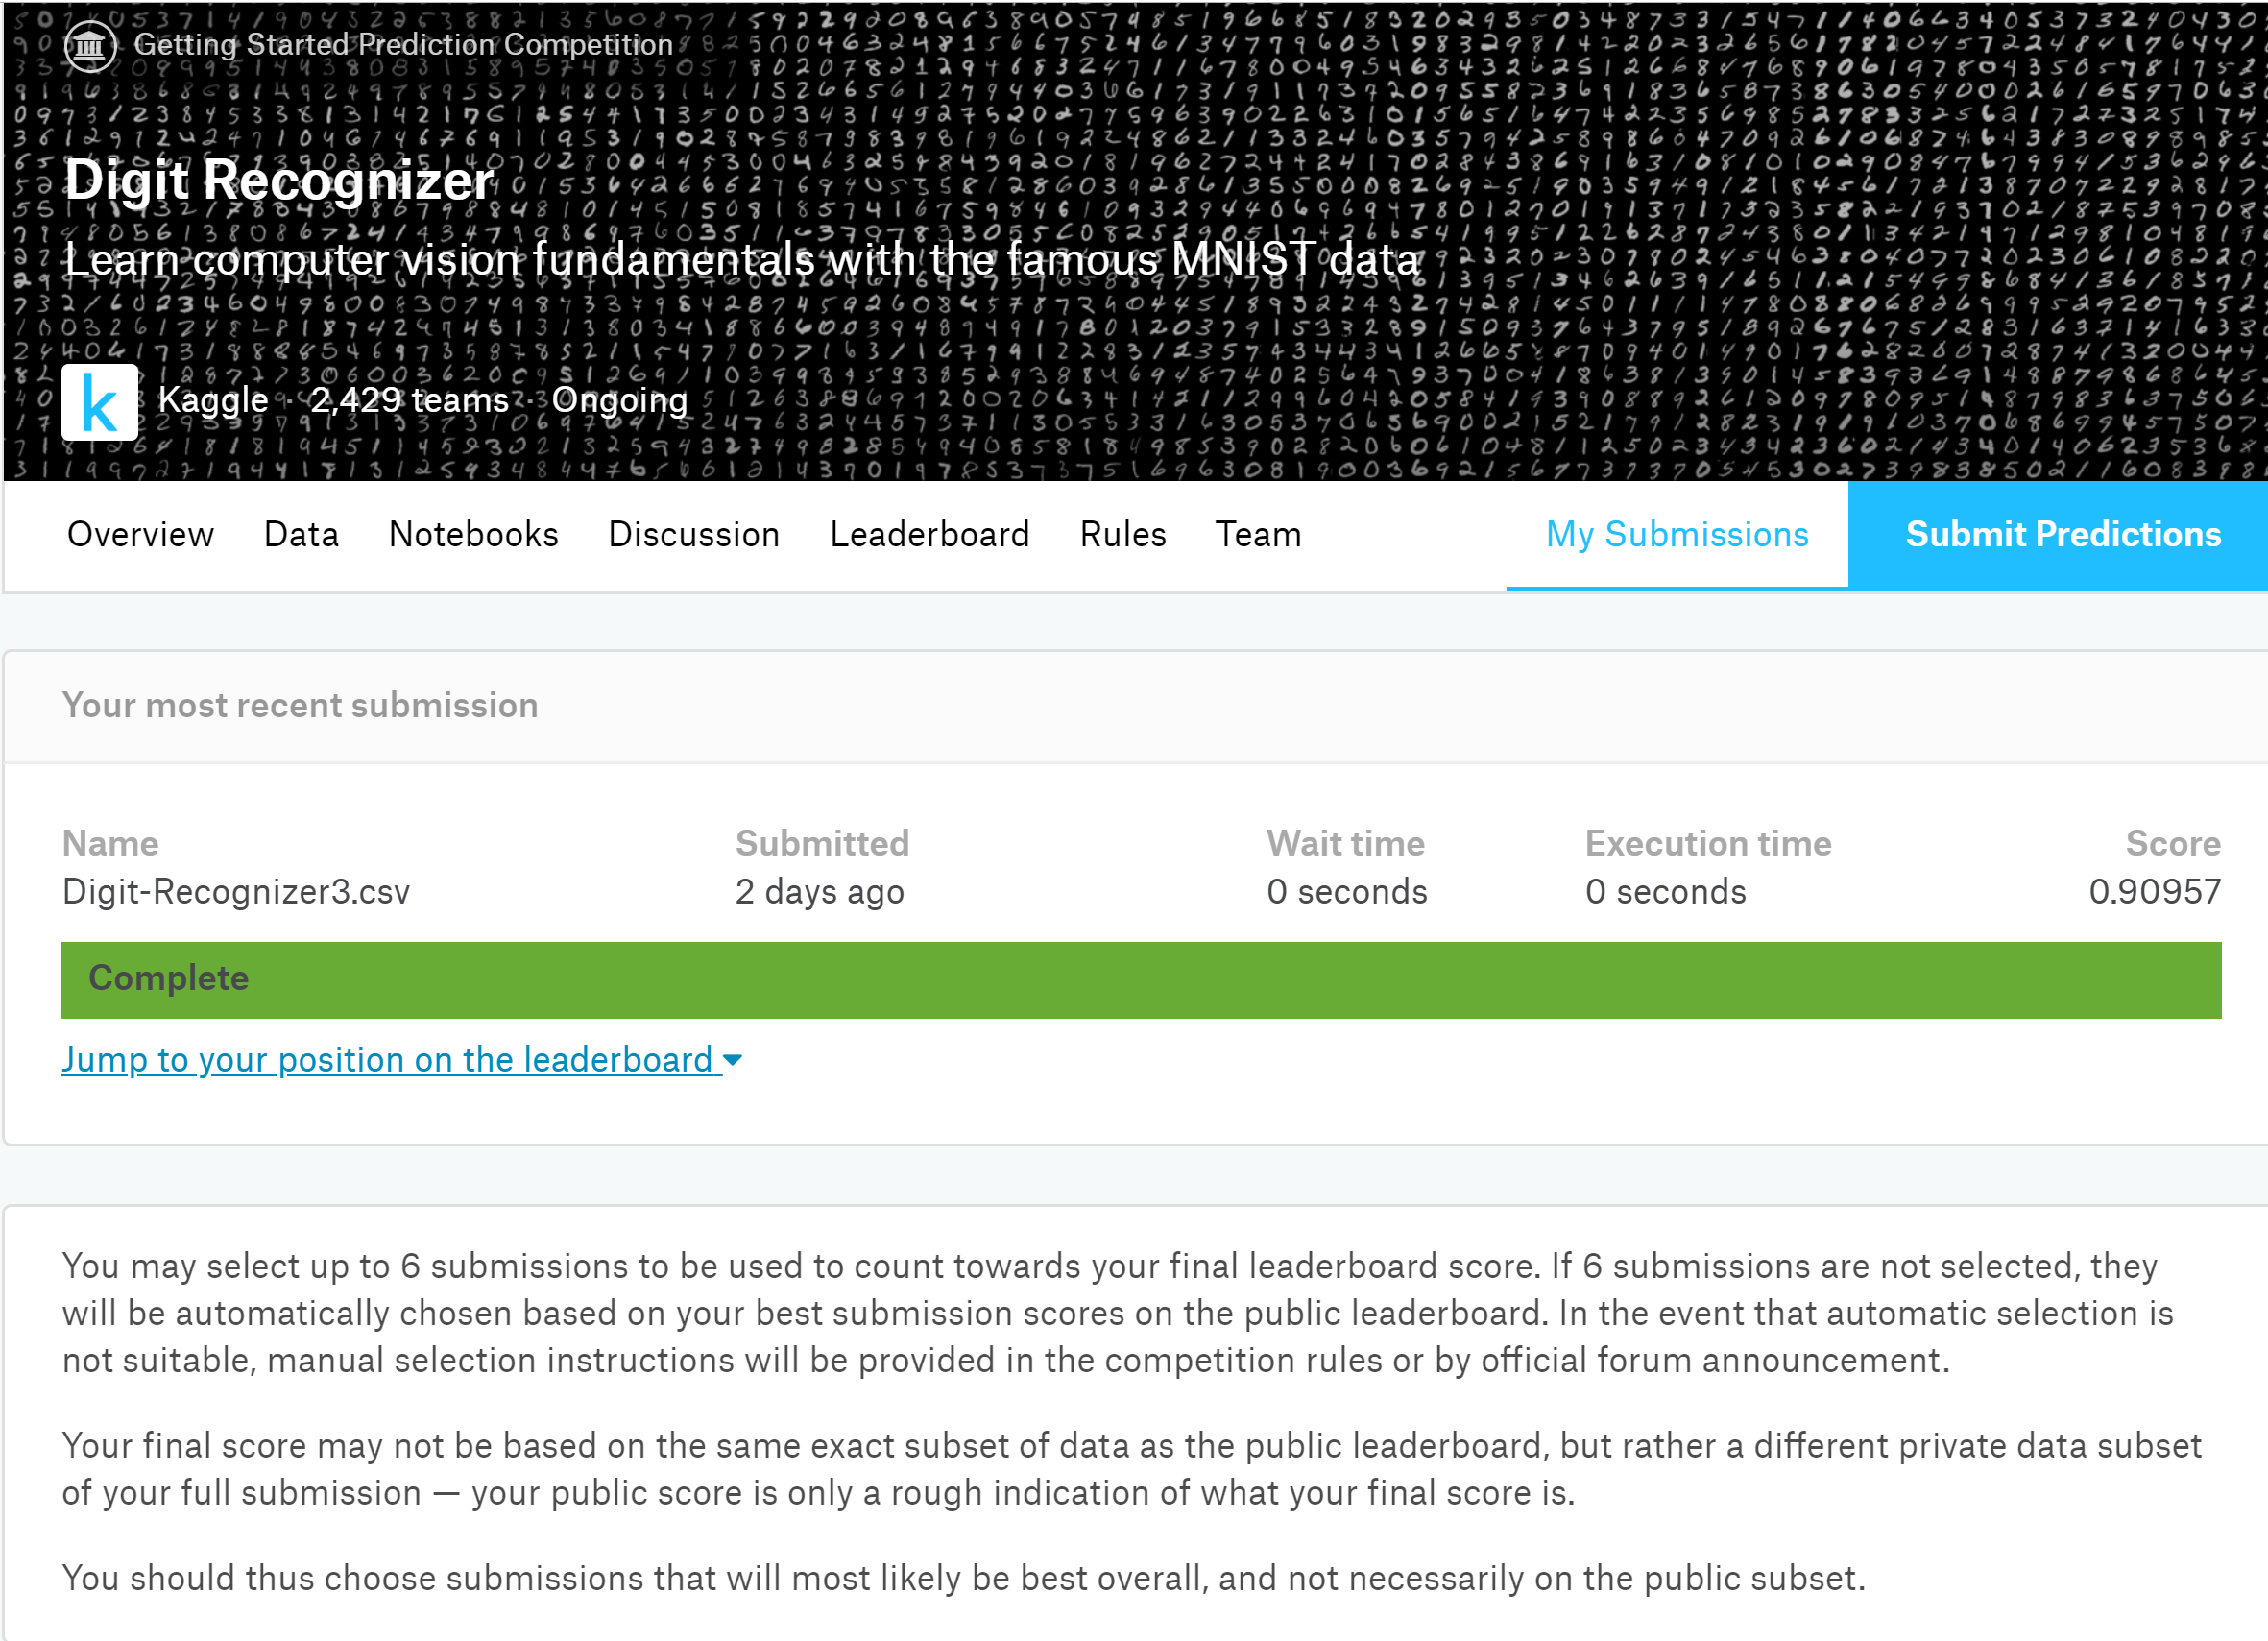